In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm

# Regression with 1 Variable

In [2]:
raw_df = pd.read_csv('../data/sample/case0701.csv')
raw_df.describe()

,Velocity,Distance
count,24.000000,24.000000
mean,373.125000,0.911250
std,371.254666,0.645744
min,-220.000000,0.030000
25%,165.000000,0.407500
50%,295.000000,0.900000
75%,537.500000,1.175000
max,1090.000000,2.000000


- Dependent variable: Distance
- Independent variable: Velocity

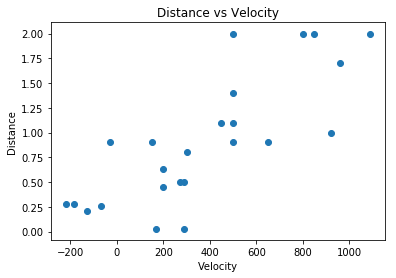

In [3]:
plt.title('Distance vs Velocity')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.scatter(raw_df.Velocity, raw_df.Distance)

### Distance
$ \text{We are interested in only Distance so we shift all of the data points to the y-axis. Calculate the mean of distance and draw a horizontal line (blue).}$
$\text{Then we calculate the variance of Distance by sum over the squares of distance of data from the mean.} $

In [4]:
n = len(raw_df)
distance_mean = raw_df.Distance.mean()
distance_var = raw_df.Distance.var()
distance_mean , distance_var

(0.9112499999999999, 0.41698532608695654)

Text(0.002,1,'Mean')

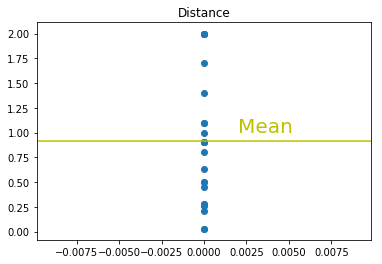

In [5]:
plt.title('Distance')
plt.scatter(np.zeros(len(raw_df)), raw_df.Distance)
plt.axhline(distance_mean, color='y')
plt.text(0.002,1,'Mean', fontsize=20, color='y')

####  Statistics

$$\text{Variance}=\frac{\sum^n_1 (y-\overline{y})^2}{n} = 0.417,$$
$$\text{where  }\overline{y}= \frac{\sum^n_1 y}{n}= 0.911$$

---

# Fit a line using Least Square

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(raw_df.values[:,0].reshape(-1, 1),raw_df.values[:,1].reshape(-1, 1))
lr.coef_, lr.intercept_

(array([[0.00137241]]), array([0.39917044]))

In [7]:
df = raw_df.copy()
df['pred'] = df['Velocity'].map(lambda x: lr.coef_[0][0]*x + lr.intercept_[0])

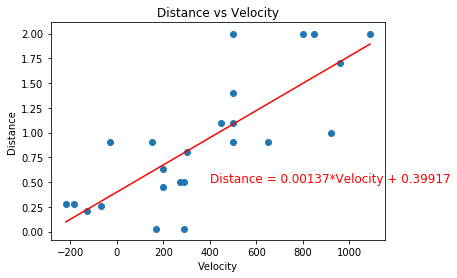

In [8]:
plt.title('Distance vs Velocity')
plt.xlabel('Velocity')
plt.ylabel('Distance')
plt.scatter(raw_df.Velocity, raw_df.Distance)
x = np.arange(raw_df.Velocity.min(), raw_df.Velocity.max())
y_pred = lr.coef_[0][0]*x + lr.intercept_[0]
plt.text(400,0.5,'Distance = {}*Velocity + {}'.format(round(lr.coef_[0][0],5),round(lr.intercept_[0],5)), fontsize=12, color='r')
plt.plot(x,y_pred, color='r')

$$\text{Variance of fitted model}=\frac{\sum^n_1 (y-\overline{y})^2}{n} = 0.157$$
$$\text{where }\overline{y} = \alpha_0 + \alpha_1x = 0.39917 + 0.00137 x$$

In [25]:
df['errors'] = df['pred']  - df['Distance']
df['errors'].var()

0.1573821345458552

## R^2

Text(600,0,'Var(fit) = 0.157')

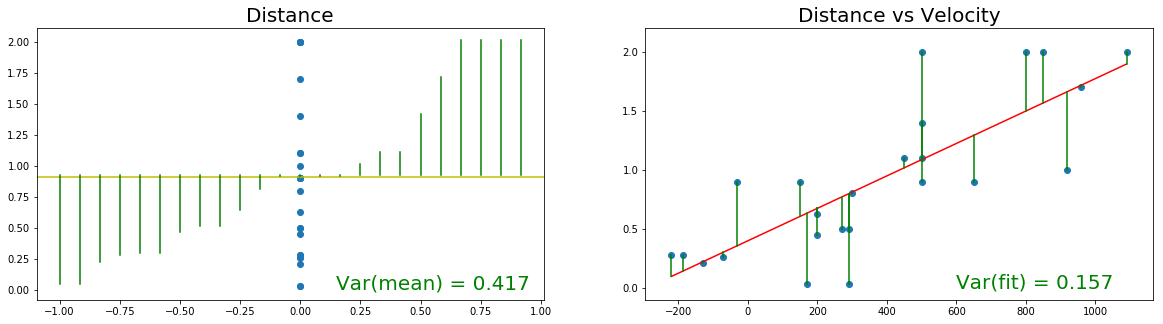

In [28]:
plt.rcParams['figure.figsize'] = [20, 5]
y_min = -0.1
y_max = 2.1
x_min = -1
x_max = 1
plt.ylim(y_min,y_max)
plt.xlim(x_min, x_max)

plt.subplot(1, 2, 1)
plt.title('Distance',fontsize = 20)
plt.axhline(distance_mean, color='y')
mid = (distance_mean - y_min)/(y_max-y_min)
for i, j in zip(np.arange(x_min, x_max, (x_max-x_min)/n), raw_df.Distance):
    data = (j-y_min)/(y_max-y_min)
    if data < mid:
        plt.axvline(i,data,mid,color='g')
    else:
        plt.axvline(i,mid,data,color='g')
plt.text(0.15,0,'Var(mean) = 0.417',fontsize = 20,color='g')
plt.scatter(np.zeros(len(raw_df)), raw_df.Distance)

plt.subplot(1, 2, 2)
y_min=-0.1
y_max = 2.2
plt.ylim(y_min,y_max)
x = np.arange(raw_df.Velocity.min(), raw_df.Velocity.max())
y_pred = lr.coef_[0][0]*x + lr.intercept_[0]
plt.plot(x,y_pred, color='r')
plt.scatter(raw_df.Velocity, raw_df.Distance)
for x, y ,y_bar,_ in df.values:
    _y = (y-y_min)/(y_max-y_min)
    _y_bar = (y_bar-y_min)/(y_max-y_min)
    if y < y_bar:
        plt.axvline(x,_y,_y_bar,color='g')
    else:
        plt.axvline(x,_y_bar,_y,color='g')
plt.title('Distance vs Velocity',fontsize = 20)       
plt.text(600,0,'Var(fit) = 0.157',fontsize = 20,color='g')

$ \text{The residuals (green lines) represent the variation that remains after fitting the line. There is less variation around the line fitted by least-squares. } $

$R^2 \text{ tells us how much of the variation in distance can be explained when taking velocity into account.} $

$$ R^2 = \frac{Var(\text{mean}) - Var(\text{fit})}{Var(\text{mean})} = \frac{\text{Variation in distance explained by velocity}}{\text{variation by distance without taking velocity into account}} = \frac{0.417-0.157}{0.417} = 0.62 = 62\text{%} $$

$ \text{This means there is a 62% reduction in variance when we take velocity into account, i.e. Velocity explains 62% of the variation in Distance} $

---

## F

$ \text{p-value for } R^2 \text{ comes from } F $

$$ F = \frac{Var(\text{mean}) - Var(\text{fit}) / p_{extra}}{Var(\text{fit}) / (n-p_{fit})} = \frac{\text{Variation in distance explained by velocity}}{\text{variation in distance not explained by velocity (leftover variances)}} = \frac{(0.417-0.157)/1}{(0.157)/(24-1)} = 38.089 $$

$ p \text{ = parameters (e.g. mean)} $

$ \text{If the "fit" is good, then} $
$$ F \longrightarrow \frac{\text{large number}}{\text{small number}} = \text{really large number} $$

## Residuals

In [ ]:
plt.title('Errors Distribution')
plt.axhline(df['errors'].mean(),color='y')
plt.scatter(df['Velocity'],df['errors'])

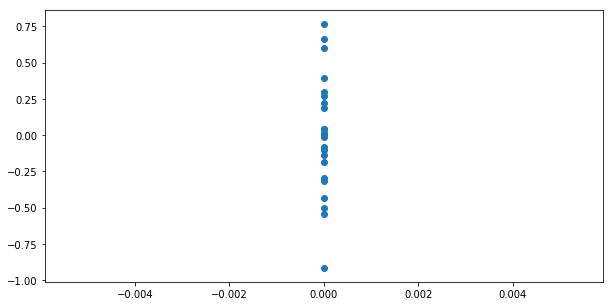

In [139]:
plt.scatter(np.zeros(len(df)), df['errors'])

In [64]:
df['errors'].sort_values()

20   -0.914626
11   -0.542002
22   -0.502904
21   -0.434283
18   -0.314626
13   -0.294968
5    -0.182759
4    -0.134725
23   -0.104905
16   -0.083246
17   -0.014626
2     0.010757
10    0.010893
19    0.016682
3     0.043102
9     0.043652
14    0.185374
6     0.223652
8     0.269720
7     0.297169
12    0.391235
0     0.602480
15    0.661785
1     0.767169
Name: errors, dtype: float64

In [50]:
plt.rcParams['figure.figsize'] = [20, 5]

### QQ Plot - test the type distribution: is it normal?

In [47]:
import matplotlib.gridspec as gridspec

In [76]:
1/25

0.04

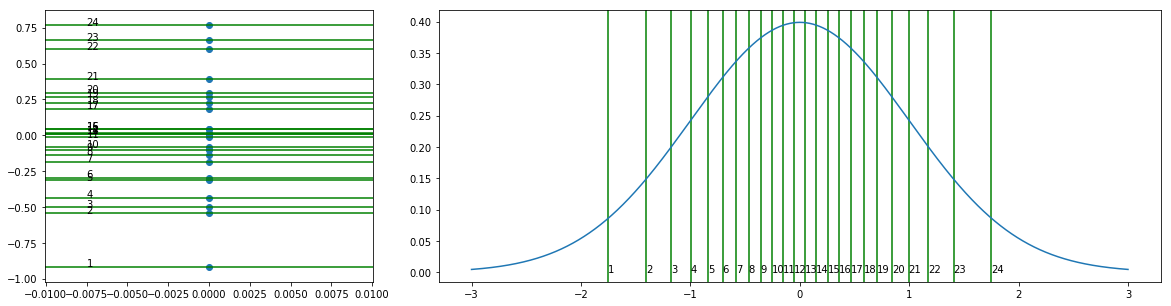

In [84]:
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(1,3)

plt.subplot2grid((1,3), (0,0))
for i,j in enumerate(df['errors'].sort_values()):
    plt.axhline(j, color='g')
    plt.text(-0.0075,j,i+1)
plt.scatter(np.zeros(len(df)), df['errors'])

plt.subplot2grid((1,3), (0,1), colspan=2)
x_axis = np.arange(-3, 3, 0.001)
for i in range(len(df['errors'])):
    percentile = (i+1)/(len(df['errors'])+1)
    plt.axvline(norm.ppf(percentile),color='g')
    plt.text(norm.ppf(percentile),0,i+1)
plt.plot(x_axis, norm.pdf(x_axis,0,1))

In [113]:
quantile_df = pd.DataFrame(df['errors'].sort_values()).rename(columns={'errors':'Data Quantiles'}).reset_index().drop('index',1)
quantile_df['Normal Quantiles'] = pd.Series([norm.ppf((i+1)/(len(df['errors'])+1)) for i in range(len(df['errors']))])
quantile_df.head()

,Data Quantiles,Normal Quantiles
0,-0.914626,-1.750686
1,-0.542002,-1.405072
2,-0.502904,-1.174987
3,-0.434283,-0.994458
4,-0.314626,-0.841621


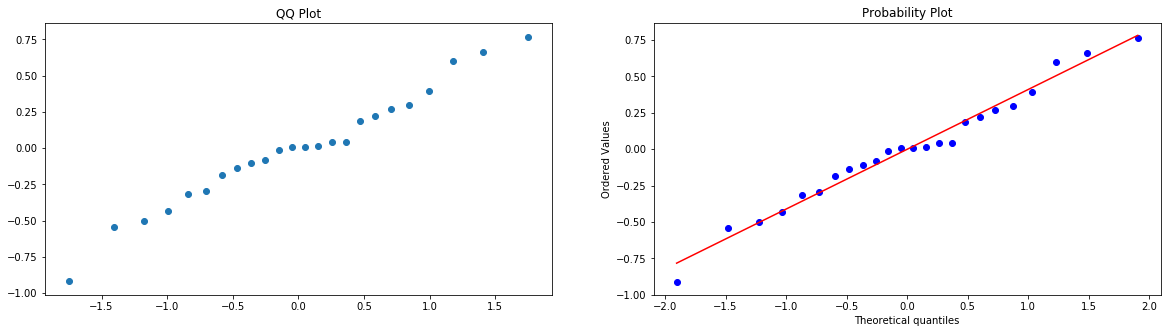

In [117]:
plt.subplot(1,2,1)
plt.title('QQ Plot')
plt.scatter(quantile_df['Normal Quantiles'],quantile_df['Data Quantiles'])

plt.subplot(1,2,2)
probability_plot = stats.probplot(df['errors'], dist='norm', plot=plt)